## 单摆运动数值模拟与探究
#### 郭嘉伟 2021011787 微信号kaku1244683675

### 一、背景介绍
单摆是一个简单的物理模型。在单摆模型中，我们已知重力加速度$g$、摆锤质量$m$、绳长$L$，以及初始释放角度$\theta_0$，一般还默认摆球由初始位置自由释放，目的是研究摆球之后的角度随时间变化的关系$\theta(t)$，以及由此衍生出的周期、能量等问题。


<div style="text-align:center;">
  <img src="image/单摆.png" alt="单摆模型" width="300">
</div>

跟据牛顿运动定律与刚体的转动方程，我们知道小球的运动可以描述为
\begin{equation}
mL\frac{d^2\theta}{dt^2} =  -mg \sin(\theta) 
\end{equation}

从而
\begin{equation}
\frac{d^2\theta }{dt^2} + \frac{g}{L} \sin(\theta) = 0 
\end{equation}

此方程的解析解并不能用初等函数表达，但其实可以用第一类不完全椭圆函数表达。因此，在通识物理中，着重研究的是初始角度较小，以至于$\sin \theta \approx \theta$的情形，这时方程化为

\begin{equation}
\frac{d^2\theta }{dt^2} + \frac{g}{L} \theta = 0
\end{equation}

这就是简谐运动的方程，很容易得到其解析解为
\begin{equation}
\theta(t) = \theta_0 \cos (\sqrt{\frac{g}{L}}t)
\end{equation}

从而周期为
\begin{equation}
T=2 \pi \sqrt{\frac{L}{g}}
\end{equation}

但是，对于一般大角度情况，以上的简谐运动得到的方程和周期都是不准确的。

### 二、研究内容
鉴于以上问题与动机，本实验主要的内容可以划分为一下几个板块
+ 基于numpy，用Euler方法实现计算一般角度情况下单摆的数值解运动情况
+ 对比不同初始角度对运动周期等的影响
+ 用四阶Runge-Kutta方法实现计算一般角度情况下单摆的数值解运动情况
+ 对比Euler方法与四阶Runge-Kutta方法的性质
+ 将数值解与简谐运动得到的解析解在图像上进行对比
+ 基于相邻峰值逐差分析数值模拟得到的解的周期，并与简谐运动得到的理论解做比较
+ 观察有阻尼条件下的单摆运动，并将理论解与周期解做对比
+ 尝试用特殊函数给出一般情况下周期的理论解，与数值解做比较
+ 建立双摆的数学模型，并基于四阶Runge-Kutta方法进行模拟，分析其混沌性
+ 将双摆的运动图像做成动画


### 三、实验与算法实现

本部分将因循研究内容的指导，一步步实现本研究的主要算法，同时进行相应的算例验证。

#### 3.1 Euler方法实现计算一般角度情况下单摆的数值解运动情况
本部分利用numpy，计算给定一个初始角度$\theta_0$，摆球释放后的$\theta(t)$关系，并利用matplotlib绘图。以下实验中，我们设定$L=1m, m=1kg$

##### <span style="color:orange;">Euler 方法</span>
先导入必要的库

In [565]:
import numpy as np
import matplotlib.pyplot as plt

定义最基本的微分方程：详细解说请看注释

In [566]:
"""
输入此时刻的角度、角速度、阻尼系数（目前还用不到）
输出此时刻的角速度、角加速度
"""
def pendulum_dynamics(theta, omega, damping_factor): 
    g = 9.8  # 重力加速度
    length = 1.0  # 绳长
    m = 1.0

    # 动力学方程
    dtheta_dt = omega
    domega_dt = -(g / length) * np.sin(theta)- damping_factor * omega

    return dtheta_dt, domega_dt

实现欧拉方法：简单地用`pendulum_dynamics`得到的角速度、角加速度来用一步更新得到下一时刻的角度、加速度

In [567]:
""" 输入此时刻角度、角速度、阻尼系数与时间步长（h）
    输出下一时刻新的角度、角速度
"""
def euler(theta, omega, damping_factor, h):
    dtheta_dt, domega_dt = pendulum_dynamics(theta, omega, damping_factor)

    omega_new = omega + domega_dt * h
    theta_new = theta + omega_new * h
    return theta_new, omega_new

"""
    可选方法
"""
SimulateMethod = {
    "euler": euler,
}


写一个计算轨迹的函数：一步一步自回归地得到轨迹

In [568]:
"""
    输入初始角度、模拟步数、每步时间长度、模拟方法（默认是euler，一会还有rk4）、阻尼系数
    输出角度在模拟步数范围内的值
"""
def simulate_pendulum(initial_angle, num_steps, time_step, method="euler", damping_factor = 0.0):

    # 初始化数组
    angles = np.zeros(num_steps)
    angular_velocities = np.zeros(num_steps)

    # 设置初始条件
    angles[0] = initial_angle
    angular_velocities[0] = 0.0
    
    update_func=SimulateMethod[method]
    
    for step in range(1, num_steps):
        angles[step], angular_velocities[step] = update_func(angles[step-1], angular_velocities[step-1], damping_factor, time_step)

    return angles

最后是执行与可视化模块。运行到这里，应该就可以看到图像了。

In [569]:
# 模拟参数
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 100  # 模拟步数
time_step = 0.1  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

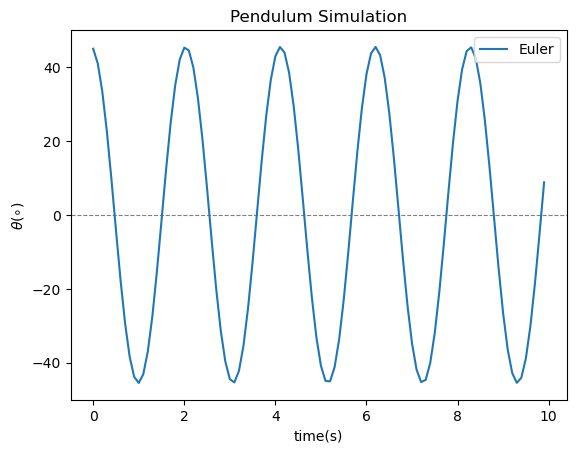

In [570]:
angles_euler = simulate_pendulum(np.radians(45), num_steps, time_step, method="euler",damping_factor=damping_factor)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

#### 3.2 对比不同初始角度对运动周期等的影响
接下来是一些角度的对比，这里设置了$\theta = 5^\circ、10^\circ、20^\circ、50^\circ、80^\circ$

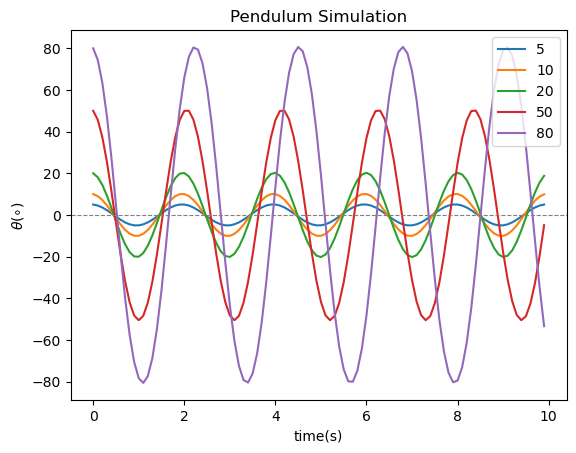

In [571]:
inits = [5, 10, 20, 50, 80] # 初始角度是这些

angles = [simulate_pendulum(np.radians(inits[i]), num_steps, time_step, method="euler",damping_factor=damping_factor) for i in range(len(inits))]

for i in range(len(inits)):
    plt.plot(time_values, np.degrees(angles[i]), label=str(inits[i]))
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

可以发现，一般来讲，初始角度越大，周期越大


#### 3.3 四阶Runge-Kutta方法实现计算一般角度情况下单摆的数值解运动情况
四阶 Runge-Kutta 方法（RK4）是一种数值求解常微分方程的方法，特别是用于求解初值问题。它是 Runge-Kutta 方法家族中的一员，通常用于求解一阶常微分方程。RK4 方法是一种比较精确的显式（explicit）数值积分方法。RK4 方法的基本思想是通过对微分方程的多个点进行加权平均来估计下一个时间步长上的解。

具体来说，是通过四个斜率。设h为时间步长，则

\begin{align*}
    % 计算斜率 k_1
    k_1 &= h \cdot f(t_n, y_n) \\
    % 计算斜率 k_2
    k_2 &= h \cdot f\left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2}\right) \\
    % 计算斜率 k_3
    k_3 &= h \cdot f\left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2}\right) \\
    % 计算斜率 k_4
    k_4 &= h \cdot f(t_n + h, y_n + k_3) \\
    % 计算下一个时间步长上的解 y_{n+1}
    y_{n+1} &= y_n + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}

RK4 方法相对于较低阶的 Runge-Kutta 方法，如 Euler 方法，有更好的数值稳定性和精度。它是一种常用于求解初值问题的经典方法。本实验就在单摆问题上实现这种方法。只需要改写迭代函数如下：

In [572]:
def runge_kutta4(theta, omega, damping_factor, h):
    # RK4 方法
    k1_theta, k1_omega = pendulum_dynamics(theta, omega, damping_factor)
    k2_theta, k2_omega = pendulum_dynamics(theta + 0.5 * h * k1_theta, omega + 0.5 * h * k1_omega, damping_factor)
    k3_theta, k3_omega = pendulum_dynamics(theta + 0.5 * h * k2_theta, omega + 0.5 * h * k2_omega, damping_factor)
    k4_theta, k4_omega = pendulum_dynamics(theta + h * k3_theta, omega + h * k3_omega, damping_factor)

    # 更新角度和角速度
    theta_new = theta + (h / 6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
    omega_new = omega + (h / 6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)

    return theta_new, omega_new

SimulateMethod = {
    "euler": euler,
    "rk4": runge_kutta4,
}

其他的和Euler方法一样，也就是说本算法的方法复用性很强，基本实现了plug and play的思想。

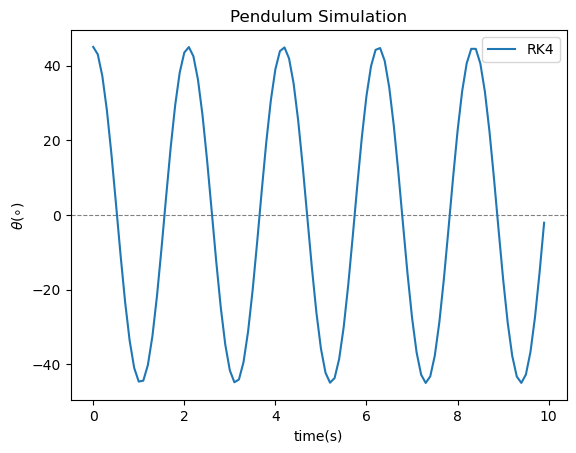

In [573]:
angles_rk4 = simulate_pendulum(np.radians(45), num_steps, time_step, method="rk4",damping_factor=damping_factor)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

#### 3.4 对比Euler方法与四阶Runge-Kutta方法的性质
本小节中将对比Euler方法与四阶Runge-Kutta方法。首先，我们来看时间步长为0.01s，模拟1000步的情况。可以看到两种线几乎重合，没有什么区别。从而得知，在步长较小的情况下，两者类似。

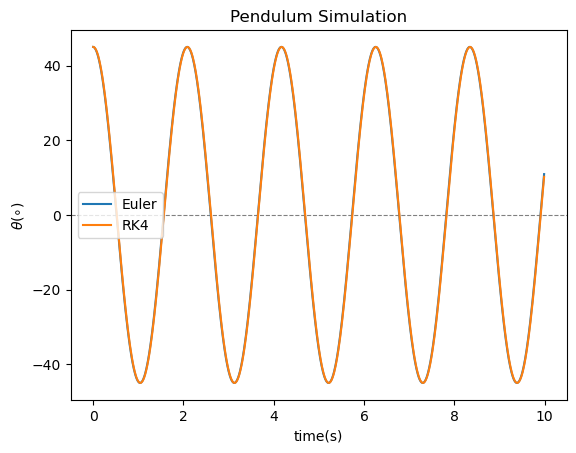

In [574]:
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

angles_euler = simulate_pendulum(np.radians(45), num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(np.radians(45), num_steps, time_step, method="rk4",damping_factor=damping_factor)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

接着我们来看时间步长为0.1s，模拟100步的情况。可以看到两者已经有了明显区别，似乎RK4方法比Euler方法更加顺滑。明显的折点更少

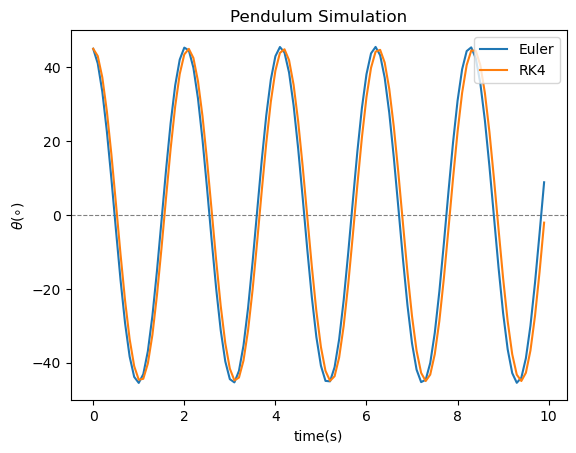

In [575]:
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 100  # 模拟步数
time_step = 0.1  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

angles_euler = simulate_pendulum(np.radians(45), num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(np.radians(45), num_steps, time_step, method="rk4",damping_factor=damping_factor)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

最后我们来看时间步长为0.2s，模拟50步的情况。可以看到两者区别更明显了，但因为没有目前理论做参照，我们并不知道哪种方法更接近真实情况。但可以猜测是RK4更好。之后我们会对此进行验证。

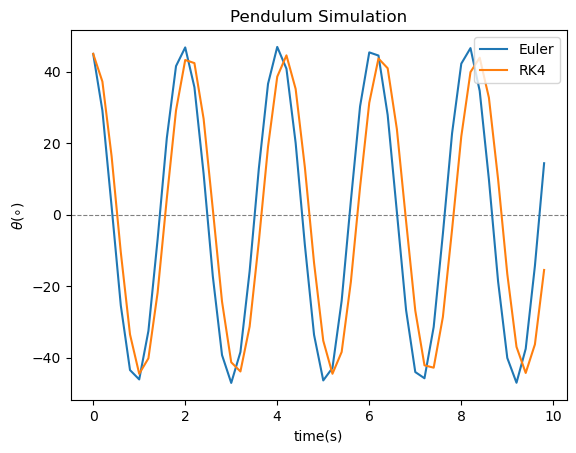

In [576]:
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 50  # 模拟步数
time_step = 0.2  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

angles_euler = simulate_pendulum(np.radians(45), num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(np.radians(45), num_steps, time_step, method="rk4",damping_factor=damping_factor)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

#### 3.5 将数值解与简谐运动得到的解析解在图像上进行对比
根据第一节中推出的公式，当$\theta$较小时，可以进行简谐近似（此处还考虑了阻尼系数，但目前设为0），用代码表达就是：

In [577]:
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

def simple_harmonic_motion(initial_angle, num_steps, time_step, damping_factor = 0.0):
    g = 9.8  # 重力加速度
    length = 1.0  # 绳长
    m=1
    
    time_values = np.arange(0, num_steps * time_step, time_step)
    
        # 计算阻尼角频率
    omega_d = np.sqrt((g / length) - (damping_factor / (2 * m))**2)

    # 计算简谐振动的角度随时间的变化
    theta = initial_angle * np.exp(-damping_factor / (2 * m) * time_values) * np.cos(omega_d * time_values)

    return theta  ###返回各个时刻的角度（数组）

接下来，将简谐运动理论解与数值模拟的解做对比

首先是小角度（$5^\circ$），可以看到几乎没有差别。说明小角度下，简谐近似是可行的。

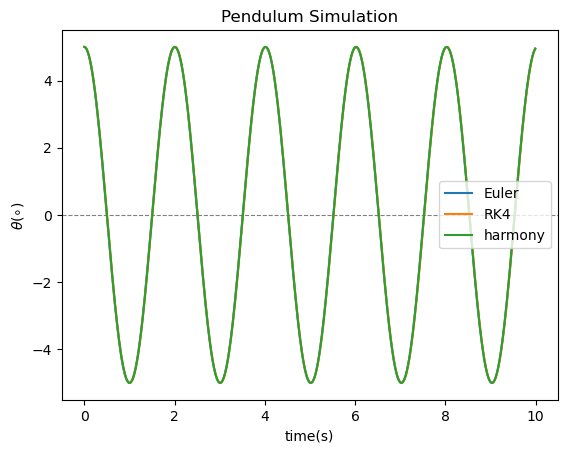

In [578]:
initial_angle = np.radians(5) 
angles_euler = simulate_pendulum(initial_angle, num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(initial_angle, num_steps, time_step, method="rk4",damping_factor=damping_factor)
angles_harmony = simple_harmonic_motion(initial_angle, num_steps, time_step,damping_factor=damping_factor)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.plot(time_values, np.degrees(angles_harmony),label='harmony')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

然后是中等角度（$30^\circ$），可以看到已经有了明显区别，模拟出的周期比简谐理论周期要大。这与3.2节的结果是吻合的。

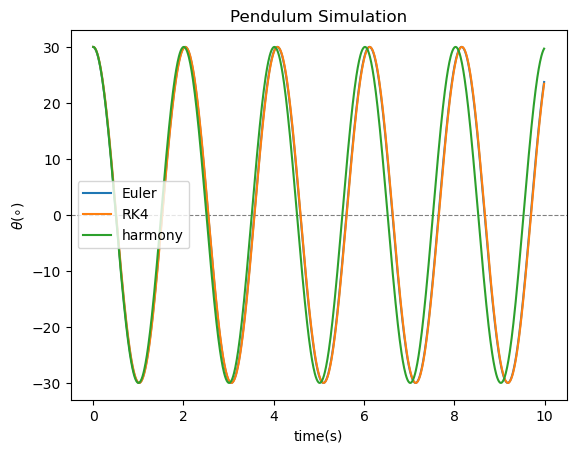

In [579]:
initial_angle = np.radians(30) 
angles_euler = simulate_pendulum(initial_angle, num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(initial_angle, num_steps, time_step, method="rk4",damping_factor=damping_factor)
angles_harmony = simple_harmonic_motion(initial_angle, num_steps, time_step,damping_factor=damping_factor)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.plot(time_values, np.degrees(angles_harmony),label='harmony')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

然后是大角度（$80^\circ$），可以看到区别相当大，模拟出的周期比简谐理论周期要大得多。这也与3.2节的结果是吻合的。

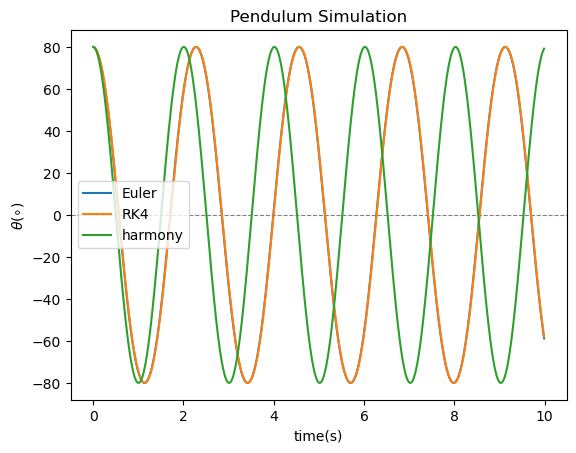

In [580]:
initial_angle = np.radians(80) 
angles_euler = simulate_pendulum(initial_angle, num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(initial_angle, num_steps, time_step, method="rk4",damping_factor=damping_factor)
angles_harmony = simple_harmonic_motion(initial_angle, num_steps, time_step,damping_factor=damping_factor)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.plot(time_values, np.degrees(angles_harmony),label='harmony')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

#### 3.6 基于相邻峰值逐差分析数值模拟得到的解的周期

在上一节中我们看到简谐理论解与实际模拟出来的解有偏差，且这个偏差随着初始角度的增大而变大。接下来的一节中，我们想要量化这种偏差。如果能给出一个这种相对偏差的经验表达式，那么将会对实践有一定的指导意义。

我们的思路是，通过相邻峰值逐差分析，得到模拟的解的主频，推算其周期$T(\theta_0)$(这里$\theta_0$表示初始角度)，与简谐运动的周期$T_0$对比较。考察两者的比
\begin{equation}
\gamma(\theta_0) = \frac{T(\theta_0)}{T_0}
\end{equation}

首先进行Fourier分析（这里我们仅对RK4方法进行，因为当我们设定时间间隔为0.01s时，RK4与Euler方法相近）

In [581]:
from scipy.signal import find_peaks

initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

# 寻找峰值并计算周期
angles_rk4 = simulate_pendulum(initial_angle, num_steps, time_step, method="rk4",damping_factor=damping_factor)
peaks, _ = find_peaks(angles_rk4)
distances = np.diff(peaks)
period = np.mean(distances)*time_step

# 输出结果
print("信号周期为：", period)


信号周期为： 2.0866666666666664


接下来，我们关注$T(\theta_0)$。为了研究一般情况下这个函数的性质，这里我们把初始角度设置为0～360度。可以想象单摆并不是用细绳拴着的，而是由一个无质量细杆连接的。这时画出$T(\theta_0)$与$T_0$

/Users/guojiawei/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/guojiawei/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


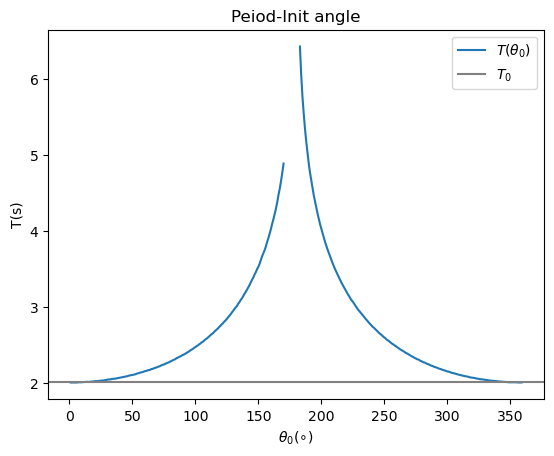

In [582]:
periods = []
for theta_0 in np.arange (0,360,1):
    angles_rk4 = simulate_pendulum(np.radians(theta_0), num_steps, time_step, method="rk4",damping_factor=damping_factor)
    peaks, _ = find_peaks(angles_rk4)
    distances = np.diff(peaks)
    period = np.mean(distances)*time_step
    periods.append(period)
    
g = 9.8
length = 1.0
T_0 =  2*np.pi*np.sqrt((length / g))

angles = np.arange(0, 360, 1)
plt.plot(angles, periods,label=r'$T(\theta_0)$')
plt.axhline(y=T_0, color='gray', label=r'$T_0$') 
plt.xlabel(r'$\theta_0 (\circ)$')
plt.ylabel('T(s)')
plt.legend()
plt.title('Peiod-Init angle')
plt.show()

可以看到当$\theta_0$很小时，单摆运动周期确实与简谐运动理论周期相近。但当大于20度左右时就有了明显差别。$\theta_0$继续增大，则$T(\theta_0)$加速上升，直至趋于无穷。对应的物理含义是：当初始角度为180度时，小球进入不稳定平衡。相当于运动周期无穷大。接下来我们想要看$\gamma(\theta_0)$的情形。

等我们对理论解有了精确的分析后，可以尝试给出这条曲线的形状。

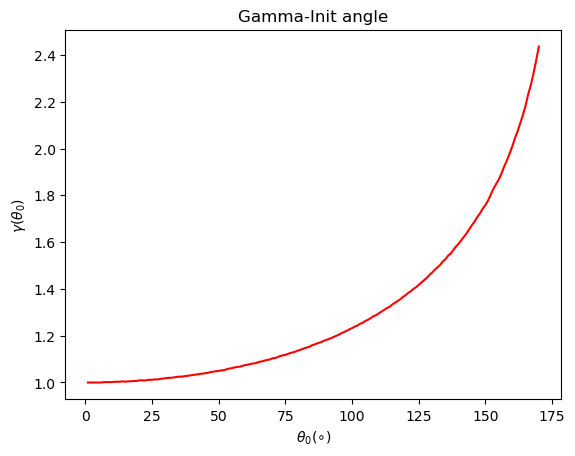

In [583]:
gamma=periods / T_0
gamma=gamma[:181]
angles=angles[:181]
plt.plot(angles, gamma, color='red')
plt.xlabel(r'$\theta_0 (\circ)$')
plt.ylabel(r'$\gamma(\theta_0)$')
plt.title('Gamma-Init angle')
plt.show()


#### 3.7 观察有阻尼条件下的单摆运动，并将理论解与周期解做对比
之前我们一直将`damping_factor`设为0，表示无阻尼、无耗散。接下来观察有阻尼的情形。

首先是不同阻尼系数下的数值模拟。（都设初始角度为45度，使用RK4方法）

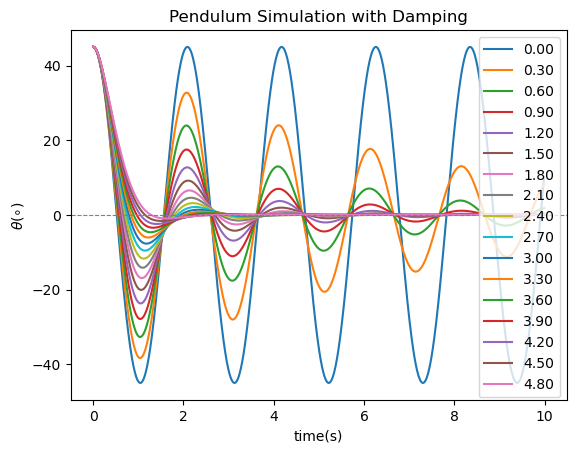

In [584]:
initial_angle = np.radians(45)  # 初始角度，以弧度表示，可以替换
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 


for damping_factor in np.arange(0,5.0,0.3):
    angles_rk4 = simulate_pendulum(np.radians(45), num_steps, time_step, method="rk4",damping_factor=damping_factor)
    plt.plot(time_values, np.degrees(angles_rk4), label="{:.2f}".format(damping_factor))
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation with Damping')
plt.legend()
plt.show()

可以明显观察到，阻尼系数越大，周期越大（从第一个周期内可以看出）。这与理论结果是吻合的。

接下来将理论解与数值解做对比。

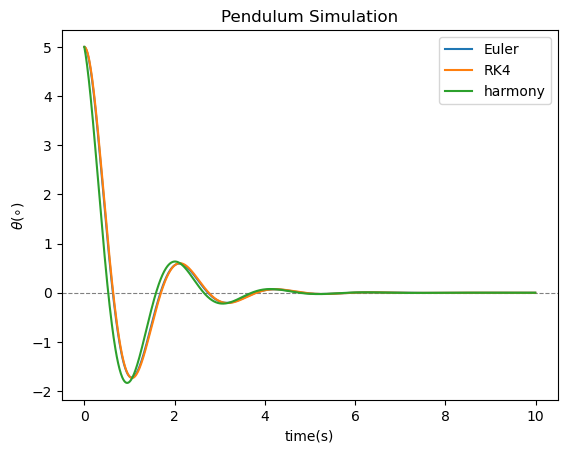

In [585]:
damping_factor = 2.0
initial_angle = np.radians(5)

angles_euler = simulate_pendulum(initial_angle, num_steps, time_step, method="euler",damping_factor=damping_factor)
angles_rk4 = simulate_pendulum(initial_angle, num_steps, time_step, method="rk4",damping_factor=damping_factor)
angles_harmony = simple_harmonic_motion(initial_angle, num_steps, time_step,damping_factor=damping_factor)

plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) 
plt.plot(time_values, np.degrees(angles_euler), label='Euler')
plt.plot(time_values, np.degrees(angles_rk4), label='RK4')
plt.plot(time_values, np.degrees(angles_harmony),label='harmony')
plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

可以看到，即便采用小角度，也是有区别的。

#### 3.8 用特殊函数给出一般情况下周期的理论解，与数值解做比较

参考已有文献，我们知道单摆的精确周期可以由如下的积分获得
\begin{equation}
T=T_0 \frac{\sqrt{2}}{\pi} \int_0 ^{\theta_0} \frac{\mathrm{d}\theta}{\sqrt{\cos \theta-\cos \theta_0}}
\end{equation}


也就是说，
\begin{equation}
\gamma(\theta_0) =  \frac{\sqrt{2}}{\pi} \int_0 ^{\theta_0} \frac{\mathrm{d}\theta}{\sqrt{\cos \theta-\cos \theta_0}}
\end{equation}

在本小节，我们将用理论的周期与数值模拟的周期做对比，

In [586]:
from scipy import integrate



def f(x, theta_0):
    return 1/ np.sqrt(np.cos(x)-np.cos(theta_0))

theta_0=np.radians(45)

# 使用 quad 函数进行积分计算,指定上下限并给出参数值
result, error = integrate.quad(f, 0, theta_0, args=(theta_0))


# 输出计算结果
print("定积分结果:", result)
print("估计的误差:", error)


定积分结果: 2.3102399113127197
估计的误差: 9.523715149839518e-11


可以看到，虽然是一个瑕积分，但scipy很好地处理了，并且积分误差在可控的范围内。接下来绘制理论周期与初始角度的关系。

/var/folders/qg/nd23tpjx1hv_4zg3p3cvxkxr0000gn/T/ipykernel_80276/1771967943.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/ np.sqrt(np.cos(x)-np.cos(theta_0))
/var/folders/qg/nd23tpjx1hv_4zg3p3cvxkxr0000gn/T/ipykernel_80276/3104899907.py:4: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  result, _ = integrate.quad(f, 0, theta_0, args=(theta_0))


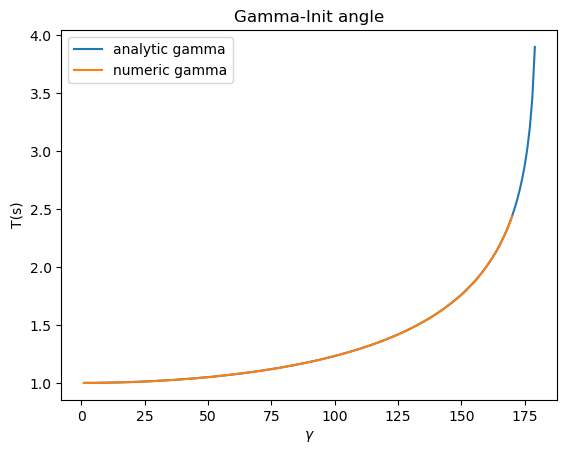

In [587]:
####  理论周期  ######
def analytic_peroid(theta_0):
    theta_0=np.radians(theta_0)
    result, _ = integrate.quad(f, 0, theta_0, args=(theta_0))
    return np.sqrt(2) * result / np.pi

periods = []
analytic_periods = []
for theta_0 in np.arange (0,180,1):
    analytic_periods.append(analytic_peroid(theta_0))


######  数值模拟  #########
damping_factor = 0.0 # 阻尼系数，可以替换，但现在设置为0
num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长
time_values = np.arange(0, num_steps * time_step, time_step) 

for theta_0 in np.arange (0,180,1):
    angles_rk4 = simulate_pendulum(np.radians(theta_0), num_steps, time_step, method="rk4",damping_factor=damping_factor)
    peaks, _ = find_peaks(angles_rk4)
    distances = np.diff(peaks)
    period = np.mean(distances)*time_step
    periods.append(period)
    
g = 9.8
length = 1.0
T_0 =  2*np.pi*np.sqrt((length / g))
gamma = periods / T_0


angles = np.arange(0, 180, 1)
plt.plot(angles, analytic_periods,label='analytic gamma')
plt.plot(angles, gamma,label='numeric gamma')
plt.xlabel(r'$\gamma $')
plt.ylabel('T(s)')
plt.legend()
plt.title('Gamma-Init angle')
plt.show()

可以看到，数值解与理论解吻合地非常贴切！

到此，本实验对单摆的讨论告一段落。

#### 3.9 建立双摆的数学模型并分析混沌性

《三体》作为一本科幻巨著，让我们深刻的了解到了在秩序之外无尽的混沌的存在。事实上，只要在单摆模型的基础上增加一个小球，就也能得到一个著名的混沌系统———双摆。

<div style="text-align:center;">
  <img src="image/双摆.jpeg" alt="双摆模型" width="500">
</div>

如果说单摆还可以在小角度情况下进行一定的理论分析，那么双摆就进一步扼杀了这种幻想。接下来，我们建立双摆的运动微分方程，并进行数值模拟。根据现有文献，设$\theta_1、theta_2$如上，并把某时刻两小球的角速度用$\omega_1、\omega_2$表示，利用牛顿运动定律和刚体转动方程，我们知道：

<div style="text-align:center;">
  <img src="image/formula.png" alt="双摆微分方程" width="800">
</div>

为了简单明了，且不失一般性，接下来我们设定$m_1=m_2=1kg, l_1=l_2=1m$。接下来用代码实现。首先是动力学方程，为了简化计算，我使用了一些中间量：

In [588]:
def double_pendulum_dynamics(theta1, theta2, omega1, omega2):
    g = 9.8  # 重力加速度
    l1 = 1.0  # 绳长
    l2 = 1.0
    m1 = 1.0
    m2 = 1.0
    
    #中间量，降低计算复杂度
    massratio=m1/m2+1
    cosdiff=np.cos(theta1-theta2)
    sindiff=np.sin(theta1-theta2)
    sin1=np.sin(theta1)
    sin2=np.sin(theta2)
    omega1_2=omega1**2*l1
    omega2_2=omega2**2*l2
    denorm=massratio-cosdiff**2
    
    
    # 动力学方程
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = ((cosdiff*sin2-massratio*sin1)*g-(cosdiff*omega1_2+omega2_2)*sindiff)/(denorm*l1)
    domega2_dt = ((cosdiff*sin1-sin2)*g*massratio+(massratio*omega1_2+cosdiff*omega2_2)*sindiff)/(denorm*l2)
    return dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt


接下来用Euler方法实现。（RK4应当效果差不多）

In [589]:
def euler_dp(theta1, theta2, omega1, omega2, h):
    dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt = double_pendulum_dynamics(theta1, theta2, omega1, omega2)

    omega1_new = omega1 + domega1_dt * h
    omega2_new = omega2 + domega2_dt * h
    theta1_new = theta1 + omega1_new * h
    theta2_new = theta2 + omega2_new * h
    return theta1_new, theta2_new, omega1_new, omega2_new

完成模拟：

In [590]:
def simulate_double_pendulum(theta10, theta20, num_steps, time_step):
    
    # 初始化数组
    theta1 = np.zeros(num_steps)
    theta2 = np.zeros(num_steps)
    angular_velocities1 = np.zeros(num_steps)
    angular_velocities2 = np.zeros(num_steps)

    # 设置初始条件
    theta1[0] = theta10
    theta2[0] = theta20
    angular_velocities1[0] = 0.0
    angular_velocities2[0] = 0.0
    
    
    
    for step in range(1, num_steps):
        theta1[step], theta2[step], angular_velocities1[step], angular_velocities2[step] = euler_dp( theta1[step-1], theta2[step-1], angular_velocities1[step-1], angular_velocities2[step-1], time_step)

    return  theta1 ,  theta2

运行与绘图：

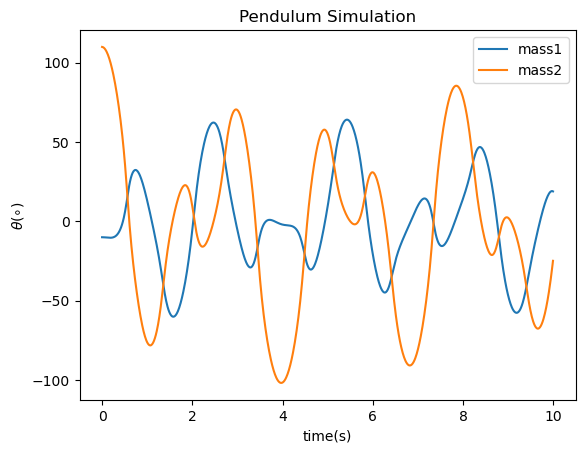

In [591]:
theta1_0 = np.radians(-10)  # 初始角度，以弧度表示，可以更改
theta2_0 = np.radians(110)  

num_steps = 1000  # 模拟步数
time_step = 0.01  # 时间步长

# 进行模拟
angles1, angles2  = simulate_double_pendulum(theta1_0, theta2_0, num_steps, time_step)

# 绘制模拟结果
time_values = np.arange(0, num_steps * time_step, time_step)
plt.plot(time_values, np.degrees(angles1), label='mass1')
plt.plot(time_values, np.degrees(angles2), label='mass2')

plt.xlabel('time(s)')
plt.ylabel(r'$\theta (\circ)$')
plt.title('Pendulum Simulation')
plt.legend()
plt.show()

运行以上代码块后，就可以发现两小球的角度随时间变化非常复杂。以上是采用了初始角度为-10度、110度的条件，读者可以自行求改来观察。但接下来为了更好的展示混沌性，我将做一下两个改变：

+ 初始角度由0～360之间的随机数生成
+ 绘制两个小球在x-y坐标空间中的位置变化，来突出混沌性

这样您就可以看到，每次运行代码块，生成的小球随时间迁移的相图是多么的变化多端！以下代码生成的图中，黑边的是小球1，白边的是小球2。色条表示时间次序。0处是第1个时间点，一直到第1000个时间点。

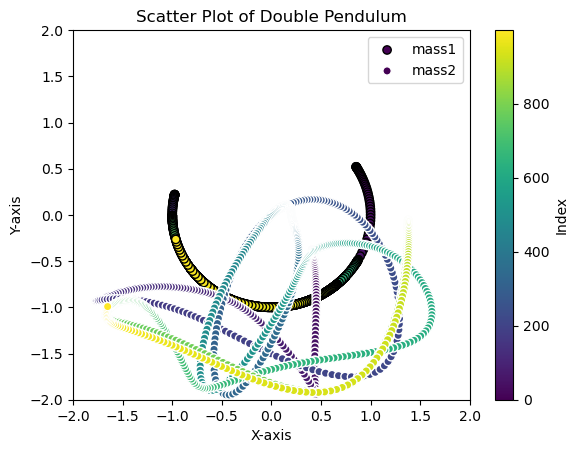

In [592]:
def random_show():
    # 模拟参数
    theta1 = np.random.uniform(0, 360)  # 初始角度，以弧度表示
    theta2 = np.random.uniform(0, 360)
    
    
    num_steps = 1000  # 模拟步数
    time_step = 0.01  # 时间步长
    l1=1.0
    l2=1.0
    
    # 进行模拟
    angles1, angles2  = simulate_double_pendulum(theta1, theta2, num_steps, time_step)
    
    x1=l1*np.sin(angles1)
    y1=-l1*np.cos(angles1)
    x2=x1+l2*np.sin(angles2)
    y2=y1-l2*np.cos(angles2)
    
    
    # 绘制模拟结果
    idx = np.arange(len(x1))
    time_values = np.arange(0, num_steps * time_step, time_step)
    plt.scatter(x1, y1, label='mass1',c=idx, cmap='viridis', edgecolors='black')
    plt.scatter(x2, y2, label='mass2',c=idx, cmap='viridis', edgecolors='white')
    
    plt.colorbar(label='Index')
    
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Scatter Plot of Double Pendulum')
    plt.legend()
    plt.show()
    
random_show()

可以观察到，小球1围绕原点运动，小球2的运动是十分复杂，每次执行都会有所不同。

#### 3.10 将双摆小球运动做成动画

为了更直观的展示双摆的混沌性，本实验将小球运动轨迹做成了动画。`animate_dp`函数接受4个参数：两小球的初始角度值，以及模拟步数、时间步长。之后便会输出一段动画，模拟两小球的运动状态。以下是函数，在下一块是运行。

In [604]:
import matplotlib.animation as animation

def animate_dp(theta1,theta2, num_steps = 1000 ,time_step = 0.01):

    # 创建画布和轴
    fig = plt.figure()
    ax = plt.subplot(111, aspect = 'equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    # 创建两个小球的点
    points, = ax.plot([], [], 'o', markersize=10)
    line, = ax.plot([], [], '-', lw=2,color="orange")
    line_origin, = ax.plot([], [], '-', lw=2,color="orange")  # 新增的原点到第一个小球的连线

    
    l1=1.0
    l2=1.0

    # 进行模拟
    angles1, angles2  = simulate_double_pendulum(theta1, theta2, num_steps, time_step)

    x1=l1*np.sin(angles1)
    y1=-l1*np.cos(angles1)
    x2=x1+l2*np.sin(angles2)
    y2=y1-l2*np.cos(angles2)

    coords = np.stack([np.stack([x1,y1],axis=1),np.stack([x2,y2],axis=1)],axis=1)
    

    # 初始化函数
    def init():
        
        points.set_data([], [])
        line.set_data([], [])
        line_origin.set_data([], [])

        return points,line ,line_origin

    # 更新函数，每个时间步更新小球的位置
    def update(frame):

        x_values = coords[frame, :, 0]
        y_values = coords[frame, :, 1]
        points.set_data(x_values, y_values)
        line.set_data(x_values, y_values)
        line_origin.set_data([0, x_values[0]], [0, y_values[0]])
    
        return points,line,line_origin


    # 创建动画
    num_frames = coords.shape[0]
    anim = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True ,interval = 10)

    # 显示动画
    plt.show()


点击下方代码块即可运行动画。其中初始值、模拟步数、时间步长都可以自主调整。

注意：由于jupyter环境问题，很有可能这个动画不能在这里播放。如果不能播放，可以通过运行`doublepen_visual.py`来播放动画！(可以去`doublepen_visual.py`中main部分修改参数，在命令行输入python doublepen_visual.py即可)

In [ ]:
animate_dp(theta1=150,theta2=-30, num_steps = 1000 ,time_step = 0.01)

In [ ]:
### 如果上面的播放不了，可以去命令行运行此指令
python doublepen_visual.py

### 四.总结

本报告主要研究了一下问题
+ 用Python实现数值模拟，解决大角度下单摆的周期问题，并同时使用Euler方法和RK4方法
+ 对比了简谐理论解与数值解
+ 对比了精确理论解与数值解
+ 实现了双摆的数值模拟，并对混沌性直观展示


以下是文件结构
- doublepen.py            #双摆模拟
- doublepen_visual.py     #双摆可视化，包括图片与视频
- image/                  #报告用到的图片
  - formula.png
  - 单摆.png
  - 双摆.jpeg
- pen.py                  #单摆模拟
- report.ipynb            #报告

如有任何问题，烦请老师与我联系～



### 五.参考文献
- 程旭东 (2023). 大角度单摆周期问题与椭圆积分. *中学物理教学参考*
- 刘丁杨 (2022). 双摆系统混沌特性研究. *重庆大学硕士学位论文*
